### 第一步：导入各种库

In [141]:
import sys
import re
import pandas as pd
import numpy as np
import sklearn
import random
import time

In [142]:
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


* sklearn.ensemble ：集成树
* LabelEncoder    :进行编码
* feature_selection:特征选择
* metrics        : 评测
* seaborn        画图


    1.Relational plots（关系图）
    1.1 scatterplot（散点图）
    1.2 lineplot（线图）
    1.3 relplot（关系图）
    2.Categorical plots（分类图）
    2.1 Categorical scatterplots（分类散点图）
    2.1.1 stripplot（分布散点图）
    2.1.2 swarmplot（分布密度散点图）
    2.2 Categorical distribution plots（分类分布图）
    2.2.1 boxplot（箱线图）
    2.2.2 violinplot（小提琴图）
    2.2.3 violinplot+stripplot（小提琴图+分布散点图）
    2.2.4 violinplot+swarmplot（小提琴图+分布密度散点图）
    2.2.5 boxplot+stripplot（箱线图+分布散点图）
    2.2.6 boxplot+swarmplot（箱线图+分布密度散点图）
    2.3 Categorical estimate plots（分类估计图）
    2.3.1 barplot（条形图）
    2.3.2 countplot（计数图）
    2.3.3 piontplot（点图）
    2.3.4 catplot（）
    3 Distribution plots（分布图）
    3.1 distplot（直方图）
    3.2 kdeplot（核密度图）
    3.3 jointplot（联合分布图）
    3.4 pairplot（变量关系组图）
    4 Regression plots（回归图）
    4.1 lmplot（回归图）
    4.2 regplot（）
    5.Matrix plots（矩阵图）
    5.1 heatmap（热力图）
    5.2 clustermap（聚类图）
    ————————————————
    版权声明：本文为CSDN博主「不会写作文的李华」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
    原文链接：https://blog.csdn.net/qq_40195360/article/details/86605860

In [143]:
from sklearn import ensemble
from sklearn.preprocessing import  LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 第二步：加载源数据集

In [144]:
data_raw=pd.read_csv(r'D:\ML\taitan\train.csv')
data_val=pd.read_csv(r'D:\ML\taitan\test.csv')

粗略看一下源数据的情况

In [145]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [147]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [148]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [149]:
# 将column都变成小写,f方便之后打字
data_raw.columns = data_raw.columns.str.lower()
data_val.columns=data_val.columns.str.lower()


In [150]:
data_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

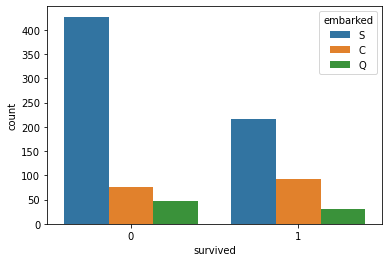

In [151]:
# 了解hue的用法,展示不同港口旅客的存亡情况
sns.countplot(data_raw['survived'],hue=data_raw['embarked'])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

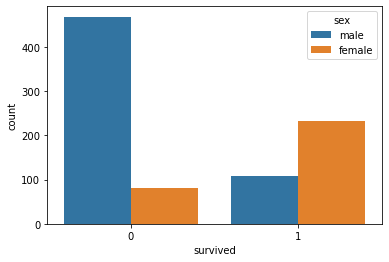

In [152]:
# 男女获救对比
sns.countplot(data_raw['survived'],hue=data_raw['sex'])


### 第三步：数据清洗

In [153]:
# 两个数据集放在一起清理
data_all=[data_raw,data_val]

In [154]:
# 空值统计
data_raw.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [155]:
data_raw['embarked'].mode()

0    S
dtype: object

In [156]:
data_val.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

##### 对空缺值的处理办法：1.补足 2.删除 3.整个字段删除
1.对age的空缺值进行补足（mean()平均值，median中位数，max最大值）
2.对fare的空缺值进行补足（用中位数即可）
3.embarked的空缺值进行补足(用出现频率最多的mode()[0],注意：因为mode()返回的是一个有索引的内容，所以要加[0])
4.空缺太大的cabin进行删除
5.passengerid无意义，进行删除

In [157]:
for dataset in data_all:
    dataset['age'].fillna(dataset['age'].median(),inplace=True)
    dataset['fare'].fillna(dataset['fare'].median(),inplace=True)
    dataset['embarked'].fillna(dataset['embarked'].mode()[0],inplace=True)



In [158]:
columns=['cabin','passengerid']
data_raw.drop(columns,axis=1,inplace=True)

In [159]:
data_val.drop(columns,axis=1,inplace=True)

In [160]:
data_raw.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [161]:
data_val.isnull().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### 第四步：构建新字段

* family_size=sibsp+parch+1
* single,0:非单身，1单身
* title(Mr. Miss Mrs,doctor)
* fare_bin(分4组)
* age_bin(分5组)


In [162]:
for dataset in data_all:
    dataset['family_size']=dataset['sibsp']+dataset['parch']+1
    dataset['single']=1
    dataset['single'].loc[dataset['family_size']>1]=0
    dataset['title']=dataset['name'].apply(lambda x:x.split(',')[1].split('.')[0])
    dataset['fare_bin']=pd.qcut(dataset['fare'],4)
    dataset['age_bin']=pd.cut(dataset['age'],5)
    
    #这里使用qcut会有一些报错
    

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [163]:
# 查看title人数的分布情况
dataset['title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: title, dtype: int64

In [164]:
data_raw['title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: title, dtype: int64

In [165]:
title_name=(data_raw['title'].value_counts()<10)
title_name

 Mr              False
 Miss            False
 Mrs             False
 Master          False
 Dr               True
 Rev              True
 Mlle             True
 Major            True
 Col              True
 the Countess     True
 Capt             True
 Ms               True
 Sir              True
 Lady             True
 Mme              True
 Don              True
 Jonkheer         True
Name: title, dtype: bool

可以看出来其实dataset不是data_raw和data_val的集合，但是目前不知道怎么处理  
接下来对data_raw['title']进行处理，小于10的归为一类，大于10的不动

In [166]:
data_raw['title']=data_raw['title'].apply(lambda x: 'other' if title_name[x] else x)

In [167]:
data_raw['title'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
other       27
Name: title, dtype: int64

In [168]:
data_raw['survived'].groupby(data_raw['title']).mean()

title
 Master    0.575000
 Miss      0.697802
 Mr        0.156673
 Mrs       0.792000
other      0.444444
Name: survived, dtype: float64

初步的得到一些结论，女性的获救率和硕士的获救率高一些  
了解groupby的用法

#### （二）构建新字段，基于scklearn中的LabelEncoder()

In [169]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,family_size,single,title,fare_bin,age_bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.252, 48.168]"


##### 机器学习中，属性值需要编程机器语言（0,1）  

需要构建新字段：  

    * sex_code
    * embarked_code
    * title_code
    * fare_bin_code
    * age_bin_code

In [170]:
label=LabelEncoder()

In [171]:
for dataset in data_all:
    # (1)构建新字段：sex_code
    dataset['sex_code'] = label.fit_transform(dataset['sex'])
    #(2)新字段：embarked_code
    dataset['embarked_code']=label.fit_transform(dataset['embarked'])
    #(3) 新字段title_code
    dataset['title_code']=label.fit_transform(dataset['title'])
    #(4)新字段 :fare_bin_code
    dataset['fare_bin_code']=label.fit_transform(dataset['fare_bin'])
    #（6） 新字段：age_bin_code
    dataset['age_bin_code']=label.fit_transform(dataset['age_bin'])

In [173]:
data_raw.drop('age_bin',axis=1,inplace=True)

In [174]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,family_size,single,title,fare_bin,sex_code,embarked_code,title_code,fare_bin_code,age_bin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,"(-0.001, 7.91]",1,2,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,"(31.0, 512.329]",0,0,3,3,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,"(7.91, 14.454]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,"(31.0, 512.329]",0,2,3,3,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,"(7.91, 14.454]",1,2,2,1,2


In [175]:
data_raw.columns.tolist()

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'embarked',
 'family_size',
 'single',
 'title',
 'fare_bin',
 'sex_code',
 'embarked_code',
 'title_code',
 'fare_bin_code',
 'age_bin_code']

挑选一些特征进行训练
### 特征选择

In [176]:
Target=['survived']

In [177]:
data_colunms_one=['sex','pclass','embarked','title','sibsp','parch','age','fare','family_size','single' ]
data_colunms=Target+data_colunms

### 用get_dummies()进行编码

In [178]:
data_one_dummy=pd.get_dummies(data_raw[data_colunms_one])

In [179]:
data_one_dummy_list=data_one_dummy.columns.to_list()

### 构建训练集和测试集

In [180]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(
data_one_dummy[data_one_dummy_list],data_raw['survived'],random_state=0
)

In [181]:
x_train.shape

(668, 17)

In [182]:
x_test.shape

(223, 17)

可知划分几乎是3:1

## 选择算法进行实现
### 选择好模型

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier#分类


In [184]:
rf = RandomForestClassifier(max_features='auto',
                           random_state=1,
                           n_jobs=-1)

In [185]:
param_grid = {
    'criterion':['gini','entropy'],
    'min_samples_leaf':[2,3,4,5],
    'min_samples_split':[11,12,13,14,15,16],
    'n_estimators':[35,50,52,55,57,60]
}

In [186]:
gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                 cv=3,
                 n_jobs=-1)

### 进行训练

In [187]:
gs=gs.fit(x_train,y_train)
print(gs.best_score_)

0.8353734900820102


In [188]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 55}


In [189]:
# 按照参数推荐，对模型参数进行修改
rf2=RandomForestClassifier(criterion='entropy', 
                           min_samples_leaf=5,
                           min_samples_split=15,
                           n_estimators= 55,
                          n_jobs=-1,
                          random_state=0)

In [190]:
# 用调整好的模型进行训练
rf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=15, n_estimators=55, n_jobs=-1,
                       random_state=0)

#### 开始预测

In [191]:
pred=rf2.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [192]:
# pred_df=pd.DataFrame(pred,columns=['survived']).join(pd.DataFrame(x_test))
# pred_df
pred_df=pd.concat([pd.DataFrame(pred),pd.DataFrame(x_test)],axis=1)
len(pred_df)

396

In [193]:
pred_df.value_counts(pred_df[0]==1)

0
False    323
True      73
dtype: int64